In [1]:
import fbprophet
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("/content/temp.xlsx")
df = df[['Sensor Value']]
df

,Sensor Value
0,18
1,18
2,18
3,18
4,18
...,...
996,29
997,29
998,29
999,29


In [3]:
Days = pd.date_range(start="2017-09-07",end="2020-06-25")
dataframe = pd.DataFrame()
dataframe['ds'] = Days
dataframe['ds'] = dataframe['ds'].dt.date
dataframe['y'] = df[['Sensor Value']]
dataframe

,ds,y
0,2017-09-07,18.0
1,2017-09-08,18.0
2,2017-09-09,18.0
3,2017-09-10,18.0
4,2017-09-11,18.0
...,...,...
1018,2020-06-21,NaN
1019,2020-06-22,NaN
1020,2020-06-23,NaN
1021,2020-06-24,NaN


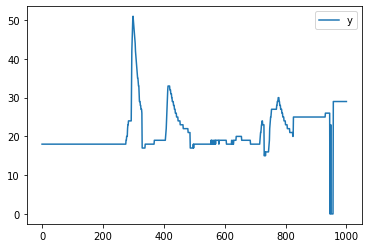

In [4]:
dataframe.dropna(axis=0,inplace=True)
dataframe.plot()

In [5]:
from fbprophet import Prophet
size = (70/100) * len(dataframe)
train = dataframe[0:int(size)]
test = dataframe[int(size):]
model = Prophet()

In [6]:
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [8]:
futureDates = model.make_future_dataframe(periods=len(test))
predictions = model.predict(futureDates)
predictions = predictions.tail(len(test))
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
700,2019-08-08,17.550677,11.631295,23.419343,17.550677,17.550677,-0.028684,-0.028684,-0.028684,-0.028684,-0.028684,-0.028684,0.0,0.0,0.0,17.521993
701,2019-08-09,17.535718,11.631272,23.318869,17.535718,17.535718,0.000465,0.000465,0.000465,0.000465,0.000465,0.000465,0.0,0.0,0.0,17.536183
702,2019-08-10,17.520759,11.632070,22.832230,17.520759,17.520759,0.039637,0.039637,0.039637,0.039637,0.039637,0.039637,0.0,0.0,0.0,17.560396
703,2019-08-11,17.505800,11.768988,23.452989,17.505800,17.505800,0.058745,0.058745,0.058745,0.058745,0.058745,0.058745,0.0,0.0,0.0,17.564545
704,2019-08-12,17.490841,11.286823,23.603829,17.490841,17.490841,0.017577,0.017577,0.017577,0.017577,0.017577,0.017577,0.0,0.0,0.0,17.508418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2020-05-30,13.122822,6.425670,20.443548,9.221084,17.159767,0.039637,0.039637,0.039637,0.039637,0.039637,0.039637,0.0,0.0,0.0,13.162459
997,2020-05-31,13.107863,5.524303,20.610659,9.191198,17.161601,0.058745,0.058745,0.058745,0.058745,0.058745,0.058745,0.0,0.0,0.0,13.166608
998,2020-06-01,13.092904,6.870145,20.617290,9.160940,17.184382,0.017577,0.017577,0.017577,0.017577,0.017577,0.017577,0.0,0.0,0.0,13.110481
999,2020-06-02,13.077945,6.597139,20.224102,9.120970,17.198866,-0.013458,-0.013458,-0.013458,-0.013458,-0.013458,-0.013458,0.0,0.0,0.0,13.064487


In [9]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test[['y']],predictions[['yhat']])
mse

107.71670680520552

In [10]:
import pickle
import pickle
with open('/content/temp_model_fbprohpet.pkl', 'wb') as fid:
    pickle.dump(model, fid)

In [13]:
preds = predictions['yhat'].tolist()

In [14]:
forecasting={
    
    'Day-1':preds[0],
    'Day-2':preds[1],
    'Day-3':preds[2],
    'Day-4':preds[3],
    'Day-5':preds[4],
    'Day-6':preds[5],
    'Day-7':preds[6],
    'MSE': mse
}

In [ ]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
cred = credentials.Certificate("../config/sensors-forecasting-fc27d-firebase-adminsdk-krgvi-403182645e.json")
firebase_admin.initialize_app(cred,{'databaseURL':'https://sensors-forecasting-fc27d-default-rtdb.firebaseio.com/'})
ref = db.reference("/Models/fbProphet")
upload_ref = ref.child('Temperature')
upload_ref.update(forecasting)